In [1]:
%matplotlib inline

import model
import pandas as pd
import numpy as np
import multiprocessing
import itertools
import glob
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [86]:
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams["font.size"] = 10
plt.rcParams["lines.markersize"] = 6
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['grid.alpha'] = .5
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.major.width'] = .5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = .5
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['figure.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 10
#plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.framealpha'] =.7
plt.rcParams['legend.title_fontsize'] = 8

# sensitivity to number of starting beliefs
Go in depth on the first one to demonstrate how and why I'll do just the comparisons in the other sensitivity tests.

In [83]:
files = glob.glob('data/Hier Avg Link Shuffle/sensitivity_to_starting_beliefs_df_*.pickle')
#files = glob.glob('data/Hierarchical Single Linkage/sensitivity_to_starting_beliefs_df_*.pickle')
dfs = [pd.read_pickle(f) for f in files]
df = pd.concat(dfs)


means = df.groupby(by=['N Starting Beliefs']).aggregate('mean')
counts = df.groupby(by=['N Starting Beliefs']).aggregate('count')
print(counts.max().max())
means.head()

1950


,Initial diffusion,Initial susceptibility,NF diffusion,NF num semantic clusters,NF susceptibility,NF top decile clustering,RF diffusion,RF num semantic clusters,RF num social clusters,RF prominence of social clusters,...,RF top decile clustering,RF top decile similarity,Rand num social clusters,Rand prominence of social clusters,Rand top decile similarity,N Agents,Mean Degree,N Concepts,Pathlength,Threshold
N Starting Beliefs,,,,,,,,,,,,,,,,,,,,,
10.0,3.798988,5.084418,3.996976,4.610256,5.084418,0.046343,4.021317,4.573846,15.367179,0.068496,...,0.051249,0.070305,15.192821,0.064891,0.069048,40.0,4.0,30.0,2.0,1.1
11.0,3.947513,5.509515,4.199782,4.712821,5.509515,0.051278,4.240226,4.569231,15.383590,0.068082,...,0.055546,0.072394,15.250769,0.063897,0.070547,40.0,4.0,30.0,2.0,1.1
12.0,4.097416,5.973351,4.412115,4.451282,5.973351,0.055575,4.479584,4.324615,15.411282,0.068887,...,0.063950,0.077543,15.368718,0.061830,0.074703,40.0,4.0,30.0,2.0,1.1
13.0,4.254992,6.460746,4.642521,4.426154,6.460746,0.061255,4.747134,4.320513,15.441538,0.069173,...,0.075191,0.083398,15.544615,0.059694,0.079521,40.0,4.0,30.0,2.0,1.1
14.0,4.411191,6.980460,4.880996,4.577436,6.980460,0.066519,5.050024,4.367179,15.421026,0.071195,...,0.083959,0.086047,15.667179,0.058124,0.080255,40.0,4.0,30.0,2.0,1.1


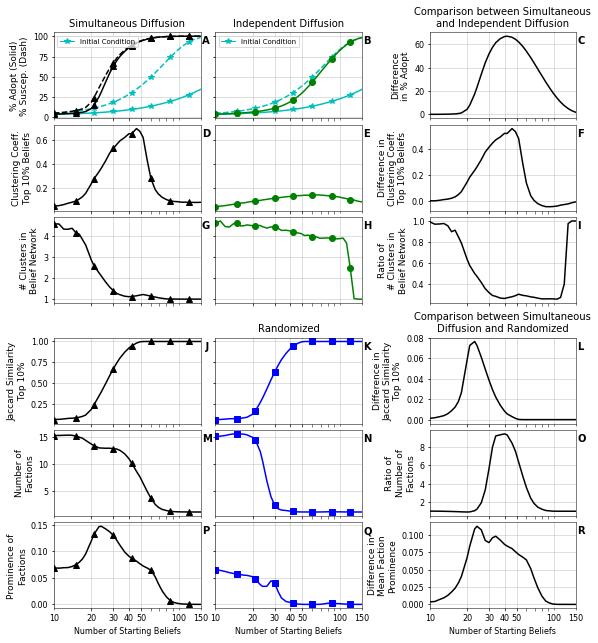

In [91]:
xticks = [10, 20, 30, 40, 50, 100, 150]

f = plt.figure(figsize=(7.25, 8))

gs1 = gridspec.GridSpec(3,2, 
                        left=0, right=.59, 
                        bottom =.53, top = 1,
                        wspace=.1, hspace=.075)

gs2 = gridspec.GridSpec(3,1, 
                        left=.72, right=1, 
                        bottom =.53, top = 1,
                        wspace=.1, hspace=.075)

gs3 = gridspec.GridSpec(3,2, 
                        left=0, right=.59, 
                        bottom =0, top = .47,
                        wspace=.1, hspace=.075)

gs4 = gridspec.GridSpec(3,1, 
                        left=.72, right=1, 
                        bottom =0, top = .47,
                        wspace=.1, hspace=.075)

gss = [gs1, gs2, gs3, gs4]
axs = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[16,17,18]]

def get_axis(axs, pos, gss=gss, f=f,
             ylabel=None, xticks=False, yticks=False, sharey=None,
             title=None, plotlabel=None):
    
    if pos[0] <= 2 and pos[1] <= 1: # upper left
        gs = 0
        x = pos[1]
        y = pos[0]
    elif pos[0] <= 2 and pos[1] > 1: # upper right
        gs = 1
        x = pos[1]-2
        y = pos[0]
    elif pos[0] > 2 and pos[1] <= 1: # lower left
        gs = 2
        x = pos[1]
        y = pos[0]-3
    elif pos[0] > 2 and pos[1] > 1: # lower right
        gs = 3
        x = pos[1]-2
        y = pos[0]-3
    else:
        raise ValueError('Bad Programming')
        
    ax = f.add_subplot(gss[gs][y,x])
    axs[pos[0]][pos[1]] = ax
    
    #ax = axs[pos[0], pos[1]]
    ax.semilogx()
    ax.set_xlim(10,150)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=9)
    if title:
        ax.set_title(title)
    ax.set_xticks([10, 20, 30, 40, 50, 100, 150])
    ax.set_xticklabels([10, 20, 30, 40, 50, 100, 150])
    ax.spines['left'].set_linewidth(.5)
    ax.spines['right'].set_linewidth(.5)
    ax.spines['top'].set_linewidth(.5)
    ax.spines['bottom'].set_linewidth(.5)
    if sharey:
        ax.get_shared_y_axes().join(ax, axs[sharey[0]][sharey[1]])
   
    ax.tick_params(length=2, labelbottom=xticks, labelleft=yticks, labelsize=8)
    
    if plotlabel:
        ax.text(1.01, 0.9, plotlabel, ha='left', va='center',
                transform = ax.transAxes, weight='bold')
    
    
    return ax


me = 5

## 0,0
ax = get_axis(axs, (0, 0), ylabel='% Adopt (Solid)\n% Suscep. (Dash)', 
              plotlabel='A', title='Simultaneous Diffusion', yticks=True)
ax.plot(means.index, means['Initial diffusion'], 'c*-', markevery=me)
ax.plot(means.index, means['Initial susceptibility'], 'c*--', markevery=me)
ax.plot(means.index, means['RF diffusion'], 'k^-', markevery=me)
ax.plot(means.index, means['RF susceptibility'], 'k^--', markevery=me)
dummies = ax.plot([], [], ls='-', c='c', linewidth=1, marker='*')          
labels = ['Initial Condition']
ax.legend(dummies, labels, framealpha=.75, fancybox=True, fontsize=7, loc='upper left')

## 0,1
ax = get_axis(axs, (0, 1), sharey=(0,0), plotlabel='B', title='Independent Diffusion')
ax.plot(means.index, means['Initial diffusion'], 'c*-', markevery=me)
ax.plot(means.index, means['Initial susceptibility'], 'c*--', markevery=me)
ax.plot(means.index, means['NF diffusion'], 'go-', markevery=me)
ax.legend(dummies, labels, framealpha=.75, fancybox=True, fontsize=7)

## 0,2
ax = get_axis(axs, (0, 2), plotlabel='C', ylabel='Difference\nin % Adopt', 
              yticks=True, title='Comparison between Simultaneous\nand Independent Diffusion')
ax.plot(means.index, means['RF diffusion'] - means['NF diffusion'], 'k')


## 1,0
ax = get_axis(axs, (1, 0), plotlabel='D', 
              ylabel='Clustering Coeff.\nTop 10% Beliefs',
              yticks=True)
ax.plot(means.index, means['RF top decile clustering'], 'k^-', markevery=me)

## 1,1
ax = get_axis(axs, (1, 1), sharey=(1, 0), plotlabel='E')
ax.plot(means.index, means['NF top decile clustering'], 'go-', markevery=me)

## 1,2
ax = get_axis(axs, (1, 2), plotlabel='F', yticks=True, 
              ylabel='Difference in\nClustering Coeff.\nTop 10% Beliefs')
ax.plot(means.index, means['RF top decile clustering'] - means['NF top decile clustering'], 'k')

## 2,0
ax = get_axis(axs, (2, 0), plotlabel='G', yticks=True,
              ylabel='# Clusters in\nBelief Network')
ax.plot(means.index, means['RF num semantic clusters'], 'k^-', markevery=me)

## 2,1
ax = get_axis(axs, (2, 1), sharey=(2, 0), plotlabel='H')
ax.plot(means.index, means['NF num semantic clusters'], 'go-', markevery=me)

## 2,2
ax = get_axis(axs, (2, 2), plotlabel='I', yticks=True, ylabel='Ratio of\n# Clusters in\nBelief Network')
ax.plot(means.index, means['RF num semantic clusters'] / means['NF num semantic clusters'], 'k')

## 3,0
ax = get_axis(axs, (3, 0), plotlabel=' J', yticks=True,
              ylabel='Jaccard Similarity\nTop 10%')
ax.plot(means.index, means['RF top decile similarity'], 'k^-', markevery=me)

## 3,1
ax = get_axis(axs, (3, 1), sharey=(3, 0), plotlabel='K', title='Randomized')
ax.plot(means.index, means['Rand top decile similarity'], 'bs-', markevery=me)

## 3,2
ax = get_axis(axs, (3, 2), plotlabel='L', yticks=True, 
              ylabel='Difference in\nJaccard Similarity\nTop 10%',
              title='Comparison between Simultaneous\nDiffusion and Randomized')
ax.plot(means.index, means['RF top decile similarity'] - means['Rand top decile similarity'], 'k')

## 4,0
ax = get_axis(axs, (4, 0), plotlabel='M', yticks=True,
              ylabel='Number of\nFactions')
ax.plot(means.index, means['RF num social clusters'], 'k^-', markevery=me)

## 4,1
ax = get_axis(axs, (4, 1), sharey=(4, 0), plotlabel='N')
ax.plot(means.index, means['Rand num social clusters'], 'bs-', markevery=me)

## 4,2
ax = get_axis(axs, (4, 2), plotlabel='O', yticks=True, ylabel='Ratio of\nNumber of\nFactions')
ax.plot(means.index, means['RF num social clusters'] / means['Rand num social clusters'], 'k')

## 5,0
ax = get_axis(axs, (5, 0), plotlabel='P', yticks=True,
              ylabel='Prominence of\nFactions', xticks=True)
ax.plot(means.index, means['RF prominence of social clusters'], 'k^-', markevery=me)
ax.set_xlabel('Number of Starting Beliefs')

## 5,1
ax = get_axis(axs, (5, 1), sharey=(5, 0), plotlabel='Q', xticks=True)
ax.plot(means.index, means['Rand prominence of social clusters'], 'bs-', markevery=me)
ax.set_xlabel('Number of Starting Beliefs')

## 5,2
ax = get_axis(axs, (5, 2), plotlabel='R', yticks=True, xticks=True,
              ylabel='Difference in\nMean Faction\nProminence')
ax.plot(means.index, means['RF prominence of social clusters'] - means['Rand prominence of social clusters'], 'k')
ax.set_xlabel('Number of Starting Beliefs')


plt.savefig('figS07 sens num starting beliefs.svg')
plt.savefig('figS07 sens num starting beliefs.png', bbox_inches='tight', dpi=150)

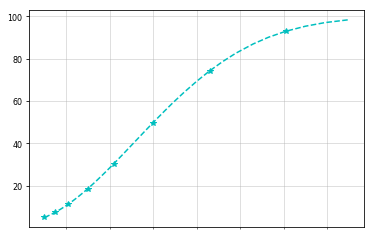

In [61]:
plt.plot(means.index, means['Initial susceptibility'], 'c*--', markevery=me)

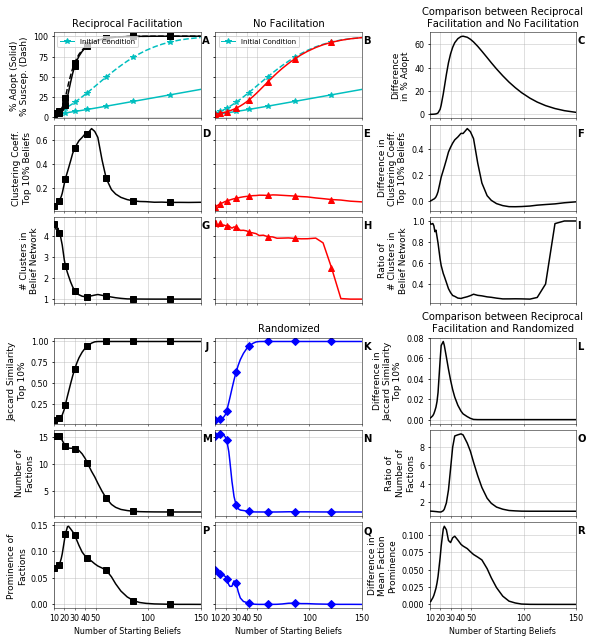

In [58]:
xticks = [10, 20, 30, 40, 50, 100, 150]

f = plt.figure(figsize=(7.25, 8))

gs1 = gridspec.GridSpec(3,2, 
                        left=0, right=.59, 
                        bottom =.53, top = 1,
                        wspace=.1, hspace=.075)

gs2 = gridspec.GridSpec(3,1, 
                        left=.72, right=1, 
                        bottom =.53, top = 1,
                        wspace=.1, hspace=.075)

gs3 = gridspec.GridSpec(3,2, 
                        left=0, right=.59, 
                        bottom =0, top = .47,
                        wspace=.1, hspace=.075)

gs4 = gridspec.GridSpec(3,1, 
                        left=.72, right=1, 
                        bottom =0, top = .47,
                        wspace=.1, hspace=.075)

gss = [gs1, gs2, gs3, gs4]
axs = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[16,17,18]]

def get_axis(axs, pos, gss=gss, f=f,
             ylabel=None, xticks=False, yticks=False, sharey=None,
             title=None, plotlabel=None):
    
    if pos[0] <= 2 and pos[1] <= 1: # upper left
        gs = 0
        x = pos[1]
        y = pos[0]
    elif pos[0] <= 2 and pos[1] > 1: # upper right
        gs = 1
        x = pos[1]-2
        y = pos[0]
    elif pos[0] > 2 and pos[1] <= 1: # lower left
        gs = 2
        x = pos[1]
        y = pos[0]-3
    elif pos[0] > 2 and pos[1] > 1: # lower right
        gs = 3
        x = pos[1]-2
        y = pos[0]-3
    else:
        raise ValueError('Bad Programming')
        
    ax = f.add_subplot(gss[gs][y,x])
    axs[pos[0]][pos[1]] = ax
    
    #ax = axs[pos[0], pos[1]]
    #ax.semilogx()
    ax.set_xlim(10,150)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=9)
    if title:
        ax.set_title(title)
    ax.set_xticks([10, 20, 30, 40, 50, 100, 150])
    ax.set_xticklabels([10, 20, 30, 40, 50, 100, 150])
    ax.spines['left'].set_linewidth(.5)
    ax.spines['right'].set_linewidth(.5)
    ax.spines['top'].set_linewidth(.5)
    ax.spines['bottom'].set_linewidth(.5)
    if sharey:
        ax.get_shared_y_axes().join(ax, axs[sharey[0]][sharey[1]])
   
    ax.tick_params(length=2, labelbottom=xticks, labelleft=yticks, labelsize=8)
    
    if plotlabel:
        ax.text(1.01, 0.9, plotlabel, ha='left', va='center',
                transform = ax.transAxes, weight='bold')
    
    
    return ax


me = 5

## 0,0
ax = get_axis(axs, (0, 0), ylabel='% Adopt (Solid)\n% Suscep. (Dash)', 
              plotlabel='A', title='Reciprocal Facilitation', yticks=True)
ax.plot(means.index, means['Initial diffusion'], 'c*-', markevery=me)
ax.plot(means.index, means['Initial susceptibility'], 'c*--', markevery=me)
ax.plot(means.index, means['RF diffusion'], 'ks-', markevery=me)
ax.plot(means.index, means['RF susceptibility'], 'ks--', markevery=me)
dummies = ax.plot([], [], ls='-', c='c', linewidth=1, marker='*')          
labels = ['Initial Condition']
ax.legend(dummies, labels, framealpha=.75, fancybox=True, fontsize=7, loc='upper left')

## 0,1
ax = get_axis(axs, (0, 1), sharey=(0,0), plotlabel='B', title='No Facilitation')
ax.plot(means.index, means['Initial diffusion'], 'c*-', markevery=me)
ax.plot(means.index, means['Initial susceptibility'], 'c*--', markevery=me)
ax.plot(means.index, means['NF diffusion'], 'r^-', markevery=me)
ax.legend(dummies, labels, framealpha=.75, fancybox=True, fontsize=7)

## 0,2
ax = get_axis(axs, (0, 2), plotlabel='C', ylabel='Difference\nin % Adopt', 
              yticks=True, title='Comparison between Reciprocal\nFacilitation and No Facilitation')
ax.plot(means.index, means['RF diffusion'] - means['NF diffusion'], 'k')


## 1,0
ax = get_axis(axs, (1, 0), plotlabel='D', 
              ylabel='Clustering Coeff.\nTop 10% Beliefs',
              yticks=True)
ax.plot(means.index, means['RF top decile clustering'], 'ks-', markevery=me)

## 1,1
ax = get_axis(axs, (1, 1), sharey=(1, 0), plotlabel='E')
ax.plot(means.index, means['NF top decile clustering'], 'r^-', markevery=me)

## 1,2
ax = get_axis(axs, (1, 2), plotlabel='F', yticks=True, 
              ylabel='Difference in\nClustering Coeff.\nTop 10% Beliefs')
ax.plot(means.index, means['RF top decile clustering'] - means['NF top decile clustering'], 'k')

## 2,0
ax = get_axis(axs, (2, 0), plotlabel='G', yticks=True,
              ylabel='# Clusters in\nBelief Network')
ax.plot(means.index, means['RF num semantic clusters'], 'ks-', markevery=me)

## 2,1
ax = get_axis(axs, (2, 1), sharey=(2, 0), plotlabel='H')
ax.plot(means.index, means['NF num semantic clusters'], 'r^-', markevery=me)

## 2,2
ax = get_axis(axs, (2, 2), plotlabel='I', yticks=True, ylabel='Ratio of\n# Clusters in\nBelief Network')
ax.plot(means.index, means['RF num semantic clusters'] / means['NF num semantic clusters'], 'k')

## 3,0
ax = get_axis(axs, (3, 0), plotlabel=' J', yticks=True,
              ylabel='Jaccard Similarity\nTop 10%')
ax.plot(means.index, means['RF top decile similarity'], 'ks-', markevery=me)

## 3,1
ax = get_axis(axs, (3, 1), sharey=(3, 0), plotlabel='K', title='Randomized')
ax.plot(means.index, means['Rand top decile similarity'], 'bD-', markevery=me)

## 3,2
ax = get_axis(axs, (3, 2), plotlabel='L', yticks=True, 
              ylabel='Difference in\nJaccard Similarity\nTop 10%',
              title='Comparison between Reciprocal\nFacilitation and Randomized')
ax.plot(means.index, means['RF top decile similarity'] - means['Rand top decile similarity'], 'k')

## 4,0
ax = get_axis(axs, (4, 0), plotlabel='M', yticks=True,
              ylabel='Number of\nFactions')
ax.plot(means.index, means['RF num social clusters'], 'ks-', markevery=me)

## 4,1
ax = get_axis(axs, (4, 1), sharey=(4, 0), plotlabel='N')
ax.plot(means.index, means['Rand num social clusters'], 'bD-', markevery=me)

## 4,2
ax = get_axis(axs, (4, 2), plotlabel='O', yticks=True, ylabel='Ratio of\nNumber of\nFactions')
ax.plot(means.index, means['RF num social clusters'] / means['Rand num social clusters'], 'k')

## 5,0
ax = get_axis(axs, (5, 0), plotlabel='P', yticks=True,
              ylabel='Prominence of\nFactions', xticks=True)
ax.plot(means.index, means['RF prominence of social clusters'], 'ks-', markevery=me)
ax.set_xlabel('Number of Starting Beliefs')

## 5,1
ax = get_axis(axs, (5, 1), sharey=(5, 0), plotlabel='Q', xticks=True)
ax.plot(means.index, means['Rand prominence of social clusters'], 'bD-', markevery=me)
ax.set_xlabel('Number of Starting Beliefs')

## 5,2
ax = get_axis(axs, (5, 2), plotlabel='R', yticks=True, xticks=True,
              ylabel='Difference in\nMean Faction\nProminence')
ax.plot(means.index, means['RF prominence of social clusters'] - means['Rand prominence of social clusters'], 'k')
ax.set_xlabel('Number of Starting Beliefs')


#plt.savefig('figS03 sens num starting beliefs.svg')
#plt.savefig('figS03 sens num starting beliefs.png', bbox_inches='tight', dpi=150)

### Yet to be explained

Why is the variance in the random prominence of social clusters so funny around 30 starting beliefs?

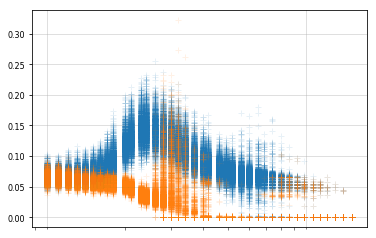

In [5]:
plt.semilogx(df['N Starting Beliefs'], df['RF prominence of social clusters'], '+', alpha=.1)
plt.semilogx(df['N Starting Beliefs'], df['Rand prominence of social clusters'], '+', alpha=.1)

# Fig S4-10

In [92]:
plt.rcParams["lines.markersize"] = 10

def draw(df, ax, plot_label, y_label, colors=['r', 'k', 'b', 'g'], markers=['^', 's', '*', 'D']):
        for i, (name, series) in enumerate(df.items()):
            ax.semilogx(series.index, series, '-', 
                        alpha=.8,
                        color=colors[i])
            
        for i, (name, series) in enumerate(df.items()):
            ax.semilogx(series.index, series, linewidth=0, 
                        marker='o',
                        markevery=range(i*3 + 1, len(series), 12),
                        color='white',
                        alpha=.7)

        if type(df.columns[0]) == str:
            for i, (name, series) in enumerate(df.items()):
                ax.semilogx(series.index, series, linewidth=0, 
                            marker=markers[i],
                            markevery=range(i*3 + 1, len(series), 12),
                            color=colors[i])

            
        else:
            for i, (name, series) in enumerate(df.items()):
                ax.semilogx(series.index, series, linewidth=0, 
                            marker='$%s$'%name,
                            markevery=range(i*3 + 1, len(series), 12),
                            color=colors[i],
                            markersize= plt.rcParams["lines.markersize"] * np.sqrt(len(str(name))/2))
                
        ax.set_xlim(10,150)
        ax.set_ylabel(y_label)
        #ax.hlines(1,10,150, linewidth=.5)
        ax.text(1.01, 0.9, plot_label, ha='left', va='center',
                transform = ax.transAxes, weight='bold', fontsize=10)

def plot_results(means, title, legend_title=None,
                 colors = ['r', 'k', 'b', 'g'],
                 markers = ['^', 's', '*', 'D']):
    
    
    f, ax = plt.subplots(3, 2, sharex=True)
    #ax = ax.flatten()
    f.set_size_inches(7.25, 4.5)



    df = (means['RF diffusion'] - means['NF diffusion']).unstack().T
    draw(df, ax[0,0], 'A', 'Difference in\n% Adopt', colors, markers)
    ax[0, 0].set_title('Comparison between Simultaneous\nand Independent Diffusion')

    df = (means['RF top decile clustering'] - means['NF top decile clustering']).unstack().T
    draw(df, ax[1,0], 'B', 'Difference in\nClustering Coeff.\nTop 10% Beliefs', colors, markers)

    df = (means['RF num semantic clusters'] / means['NF num semantic clusters']).unstack().T
    draw(df, ax[2,0], 'C', 'Ratio of\n# Clusters in\nBelief Network', colors, markers) 

    df = (means['RF top decile similarity'] - means['Rand top decile similarity']).unstack().T
    draw(df, ax[0,1], 'D', 'Difference in\nJaccard Similarity\nTop 10%', colors, markers)
    
    if type(df.columns[0]) == str:
        dummies = [plt.Line2D([], [], c=colors[i], marker=markers[i]) for i, col in enumerate(df.columns)]
    else:
        dummies = [plt.Line2D([], [], c=colors[i]) for i, col in enumerate(df.columns)]
    
    ax[0,1].legend(dummies, df.columns, title=legend_title, framealpha=.75)
    ax[0, 1].set_title('Comparison between Simultaneous\nDiffusion and Randomized')

    df = (means['RF num social clusters'] / means['Rand num social clusters']).unstack().T
    draw(df, ax[1,1], 'E', 'Ratio of\nNumber of\nFactions', colors, markers)

    df = (means['RF prominence of social clusters'] - means['Rand prominence of social clusters']).unstack().T
    draw(df, ax[2,1], 'F', 'Difference in\nMean Faction\nProminence', colors, markers)
   
    ax[2,0].set_xlabel('Starting Beliefs / Agent')
    ax[2,0].set_xticks(xticks)
    ax[2,0].set_xticklabels(xticks)
    ax[2,0].tick_params(labelbottom=True)
    
    ax[2,1].set_xlabel('Starting Beliefs / Agent')
    ax[2,1].set_xticks(xticks)
    ax[2,1].set_xticklabels(xticks)
    ax[2,1].tick_params(labelbottom=True)

    plt.suptitle(title, fontsize=12)
    plt.tight_layout(h_pad=-.1, rect=[0, 0.00, 1, 0.95])
    return f, ax


242


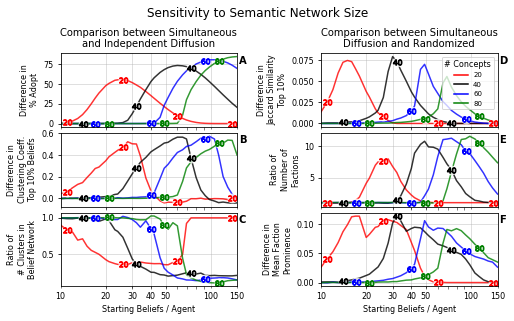

In [93]:
files = glob.glob('data/Hier Avg Link Shuffle/sensitivity_to_semantic_network_size_df_*.pickle')
dfs = [pd.read_pickle(f) for f in files]
df = pd.concat(dfs)
means = df.groupby(by=['N Concepts', 'N Starting Beliefs']).aggregate('mean')
counts = df.groupby(by=['N Concepts', 'N Starting Beliefs']).aggregate('count')
print(counts.max().max())

plt.rcParams["lines.markersize"] = 9
plot_results(means,
             title='Sensitivity to Semantic Network Size',
             legend_title='# Concepts')

plt.savefig('figS08 sens semantic net size.svg')
plt.savefig('figS08 sens semantic net size.png', bbox_inches='tight', dpi=150)

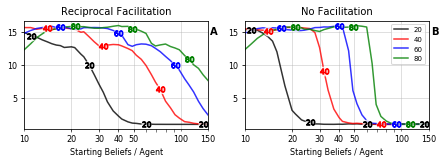

In [82]:
plt.figure(figsize=(7.25, 2))
ax1 = plt.subplot(1,2,1)
df = (means['RF num social clusters']).unstack().T
draw(df, ax1, 'A', '', colors=['k', 'r', 'b', 'g', 'orange'])
ax1.set_xlabel('Starting Beliefs / Agent')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)
ax1.tick_params(labelbottom=True)
ax1.set_title('Reciprocal Facilitation')

ax2 = plt.subplot(1,2,2, sharey=ax1)
#ax2=ax1
df = (means['Rand num social clusters']).unstack().T
draw(df, ax2, 'B', '', colors=['k', 'r', 'b', 'g', 'orange'])
ax2.set_xlabel('Starting Beliefs / Agent')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)
ax2.tick_params(labelbottom=True)
ax2.set_title('No Facilitation')
ax2.legend(df.columns, title='', framealpha=.75)

290


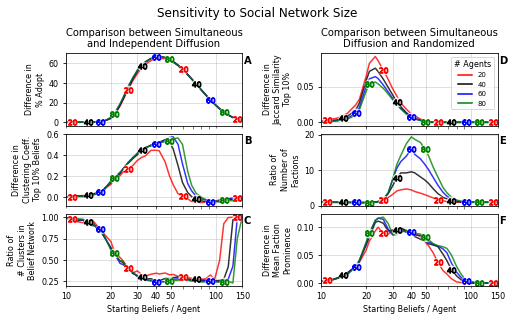

In [94]:
files = glob.glob('data/Hier Avg Link Shuffle/sensitivity_to_social_network_size_df_*.pickle')
dfs = [pd.read_pickle(f) for f in files]
df = pd.concat(dfs)
means = df.groupby(by=['N Agents', 'N Starting Beliefs']).aggregate('mean')
counts = df.groupby(by=['N Agents', 'N Starting Beliefs']).aggregate('count')
print(counts.max().max())

plt.rcParams["lines.markersize"] = 9
f, ax = plot_results(means,
                     title='Sensitivity to Social Network Size',
                     legend_title='# Agents')

plt.savefig('figS09 sens social net size.svg')
plt.savefig('figS09 sens social net size.png', bbox_inches='tight', dpi=150)

1060


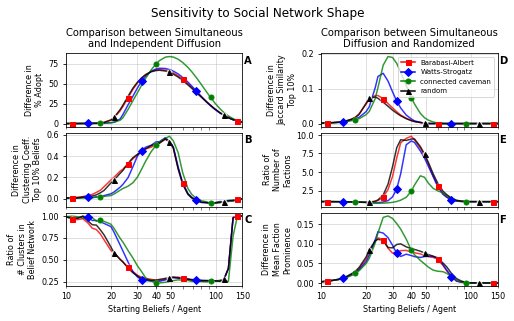

In [131]:
files = glob.glob('data/Hier Avg Link Shuffle/sensitivity_to_social_network_shape_*.pickle')
dfs = [pd.read_pickle(f) for f in files]
df = pd.concat(dfs)
means = df.groupby(by=['Network', 'N Starting Beliefs']).aggregate('mean')
means.drop(index='complete', inplace=True)
counts = df.groupby(by=['Network', 'N Starting Beliefs']).aggregate('count')
print(counts.max().max())

plt.rcParams["lines.markersize"] = 5
f, ax = plot_results(means,
                     'Sensitivity to Social Network Shape',
                     colors = ['r', 'b', 'g', 'k'],
                     markers = ['s', 'D', 'o', '^'])

plt.savefig('figS10 sens social net shape.svg')
plt.savefig('figS10 sens social net shape.png', bbox_inches='tight', dpi=150)

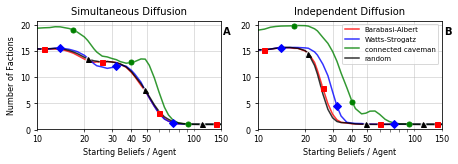

In [138]:
plt.figure(figsize=(7.25, 2))
ax1 = plt.subplot(1,2,1)
df = (means['RF num social clusters']).unstack().T
draw(df, ax1, 'A', y_label='Number of Factions', colors=['r', 'b', 'g', 'k'],
     markers=['s', 'D', 'o', '^'])
ax1.set_xlabel('Starting Beliefs / Agent')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)
ax1.tick_params(labelbottom=True)
ax1.set_title('Simultaneous Diffusion')

ax2 = plt.subplot(1,2,2, sharey=ax1)
#ax2=ax1
df = (means['Rand num social clusters']).unstack().T
draw(df, ax2, 'B', '', colors=['r', 'b', 'g', 'k'],
     markers=['s', 'D', 'o', '^'])
ax2.set_xlabel('Starting Beliefs / Agent')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)
ax2.tick_params(labelbottom=True)
ax2.set_title('Independent Diffusion')
ax2.legend(df.columns, title='', framealpha=.75)

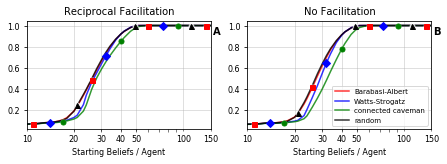

In [137]:
plt.figure(figsize=(7.25, 2))
ax1 = plt.subplot(1,2,1)
df = (means['RF top decile similarity']).unstack().T
draw(df, ax1, 'A', '', colors=['r', 'b', 'g', 'k'],
     markers=['s', 'D', 'o', '^'])
ax1.set_xlabel('Starting Beliefs / Agent')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)
ax1.tick_params(labelbottom=True)
ax1.set_title('Reciprocal Facilitation')

ax2 = plt.subplot(1,2,2, sharey=ax1)
#ax2=ax1
df = (means['Rand top decile similarity']).unstack().T
draw(df, ax2, 'B', '', colors=['r', 'b', 'g', 'k'],
     markers=['s', 'D', 'o', '^'])
ax2.set_xlabel('Starting Beliefs / Agent')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)
ax2.tick_params(labelbottom=True)
ax2.set_title('No Facilitation')
ax2.legend(df.columns, title='', framealpha=.75)

250


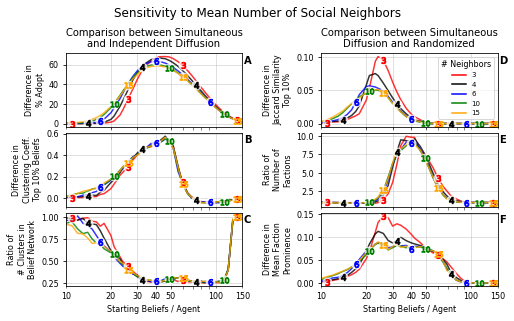

In [111]:
files = glob.glob('data/Hier Avg Link Shuffle/sensitivity_to_social_network_degree_*.pickle')
dfs = [pd.read_pickle(f) for f in files]
df = pd.concat(dfs)
means = df.groupby(by=['Mean Degree', 'N Starting Beliefs']).aggregate('mean')
counts = df.groupby(by=['Mean Degree', 'N Starting Beliefs']).aggregate('count')
print(counts.max().max())

plt.rcParams["lines.markersize"] = 9
f, ax = plot_results(means,
             'Sensitivity to Mean Number of Social Neighbors',
             colors = ['r', 'k', 'b', 'g', 'orange'],
             legend_title='# Neighbors')

plt.savefig('figS11 sens social net degree.svg')
plt.savefig('figS11 sens social net degree.png', bbox_inches='tight', dpi=150)

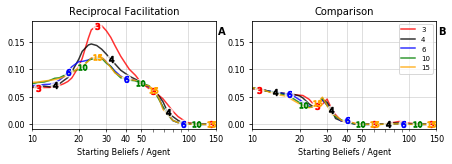

In [113]:
plt.figure(figsize=(7.25, 2))
ax1 = plt.subplot(1,2,1)
df = (means['RF prominence of social clusters']).unstack().T
draw(df, ax1, 'A', '', colors=['r', 'k', 'b', 'g', 'orange'],
     markers=['s', 'x', 'D', 'o', '^'])
ax1.set_xlabel('Starting Beliefs / Agent')
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)
ax1.tick_params(labelbottom=True)
ax1.set_title('Reciprocal Facilitation')

ax2 = plt.subplot(1,2,2, sharey=ax1)
#ax2=ax1
df = (means['Rand prominence of social clusters']).unstack().T
draw(df, ax2, 'B', '', colors=['r', 'k', 'b', 'g', 'orange'],
     markers=['s', 'x', 'D', 'o', '^'])
ax2.set_xlabel('Starting Beliefs / Agent')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks)
ax2.tick_params(labelbottom=True)
ax2.set_title('Comparison')
ax2.legend(df.columns, title='', framealpha=.75)

#### Figure 8

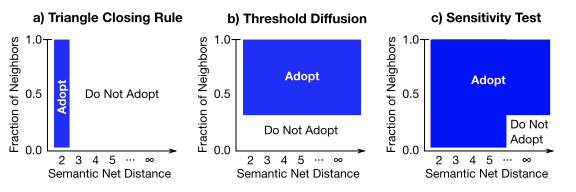



385


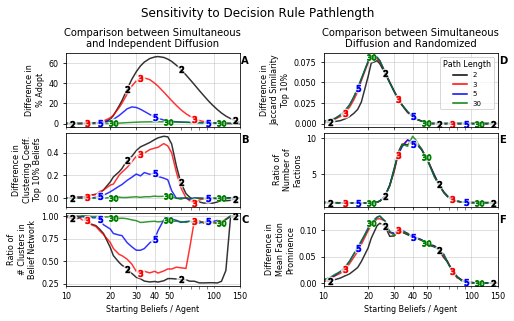

In [125]:
files = glob.glob('data/Hier Avg Link Shuffle/sensitivity_to_decision_rule_pathlength_*.pickle')
dfs = [pd.read_pickle(f) for f in files]
df = pd.concat(dfs)
means = df.groupby(by=['Pathlength', 'N Starting Beliefs']).aggregate('mean')
counts = df.groupby(by=['Pathlength', 'N Starting Beliefs']).aggregate('count')
print(counts.max().max())

plt.rcParams["lines.markersize"] = 9
f, ax = plot_results(means, 
                     'Sensitivity to Decision Rule Pathlength',
                     legend_title='Path Length',
                     colors = ['k', 'r', 'b', 'g', 'orange'])

plt.savefig('figS13 sens decision rule pathlength.svg')
plt.savefig('figS13 sens decision rule pathlength.png', bbox_inches='tight', dpi=150)

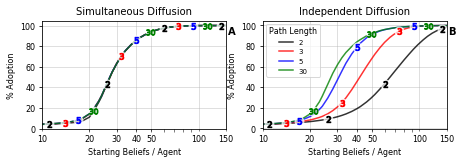

In [122]:
plt.figure(figsize=(7.25, 2))
ax = plt.subplot(1,2,1)
df = (means['RF diffusion']).unstack().T
draw(df, ax, 'A', '% Adoption', colors=['k', 'r', 'b', 'g', 'orange'])
ax.set_xlabel('Starting Beliefs / Agent')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.tick_params(labelbottom=True)
ax.set_title('Simultaneous Diffusion')

ax = plt.subplot(1,2,2)
df = (means['NF diffusion']).unstack().T
draw(df, ax, 'B', '% Adoption', colors=['k', 'r', 'b', 'g', 'orange'])
ax.set_xlabel('Starting Beliefs / Agent')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.tick_params(labelbottom=True)
ax.set_title('Independent Diffusion')
ax.legend(df.columns, title='Path Length', framealpha=.75)

plt.savefig('figS14 sens decision rule pathlength adoption.svg')
plt.savefig('figS14 sens decision rule pathlength adoption.png', bbox_inches='tight', dpi=150)

230


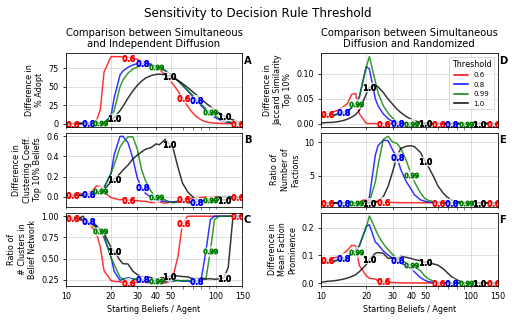

In [139]:
files = glob.glob('data/Hier Avg Link Shuffle/sensitivity_to_decision_rule_threshold_*.pickle')
dfs = [pd.read_pickle(f) for f in files]
df = pd.concat(dfs)
means = df.groupby(by=['Threshold', 'N Starting Beliefs']).aggregate('mean')
means.drop(index=0.4, inplace=True)
counts = df.groupby(by=['Threshold', 'N Starting Beliefs']).aggregate('count')
print(counts.max().max())

plt.rcParams["lines.markersize"] = 10
f, ax = plot_results(means,
             'Sensitivity to Decision Rule Threshold',
             legend_title='Threshold',
             colors = ['r', 'b', 'g', 'k'])

plt.savefig('figS16 sens decision rule threshold.svg')
plt.savefig('figS16 sens decision rule threshold.png', bbox_inches='tight', dpi=150)

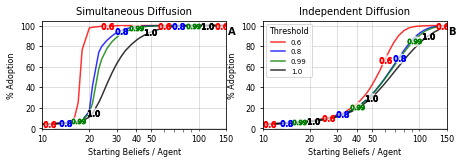

In [140]:
plt.figure(figsize=(7.25, 2))
ax = plt.subplot(1,2,1)
df = (means['RF diffusion']).unstack().T
draw(df, ax, 'A', '% Adoption', colors=['r', 'b', 'g', 'k'])
ax.set_xlabel('Starting Beliefs / Agent')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.tick_params(labelbottom=True)
ax.set_title('Simultaneous Diffusion')

ax = plt.subplot(1,2,2)
df = (means['NF diffusion']).unstack().T
draw(df, ax, 'B', '% Adoption', colors=['r', 'b', 'g', 'k'])
ax.set_xlabel('Starting Beliefs / Agent')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.tick_params(labelbottom=True)
ax.set_title('Independent Diffusion')
ax.legend(df.columns, title='Threshold', framealpha=.75)

plt.savefig('figS15 sens decision rule threshold adoption.svg')
plt.savefig('figS15 sens decision rule threshold adoption.png', bbox_inches='tight', dpi=150)

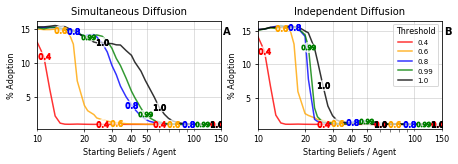

In [129]:
plt.figure(figsize=(7.25, 2))
ax = plt.subplot(1,2,1)
df = (means['RF num social clusters']).unstack().T
draw(df, ax, 'A', '% Adoption', colors=['r', 'orange', 'b', 'g', 'k'])
ax.set_xlabel('Starting Beliefs / Agent')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.tick_params(labelbottom=True)
ax.set_title('Simultaneous Diffusion')

ax = plt.subplot(1,2,2)
df = (means['Rand num social clusters']).unstack().T
draw(df, ax, 'B', '% Adoption', colors=['r', 'orange', 'b', 'g', 'k'])
ax.set_xlabel('Starting Beliefs / Agent')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.tick_params(labelbottom=True)
ax.set_title('Independent Diffusion')
ax.legend(df.columns, title='Threshold', framealpha=.75)

# plt.savefig('figS15 sens decision rule threshold adoption.svg')
# plt.savefig('figS15 sens decision rule threshold adoption.png', bbox_inches='tight', dpi=150)

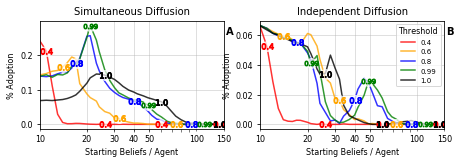

In [130]:
plt.figure(figsize=(7.25, 2))
ax = plt.subplot(1,2,1)
df = (means['RF prominence of social clusters']).unstack().T
draw(df, ax, 'A', '% Adoption', colors=['r', 'orange', 'b', 'g', 'k'])
ax.set_xlabel('Starting Beliefs / Agent')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.tick_params(labelbottom=True)
ax.set_title('Simultaneous Diffusion')

ax = plt.subplot(1,2,2)
df = (means['Rand prominence of social clusters']).unstack().T
draw(df, ax, 'B', '% Adoption', colors=['r', 'orange', 'b', 'g', 'k'])
ax.set_xlabel('Starting Beliefs / Agent')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.tick_params(labelbottom=True)
ax.set_title('Independent Diffusion')
ax.legend(df.columns, title='Threshold', framealpha=.75)

258


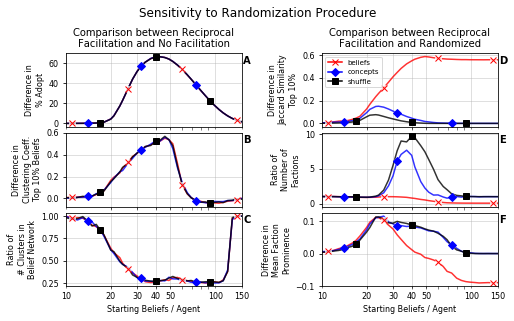

In [45]:
files = glob.glob('data/Hier Avg Link Shuffle/sensitivity_to_randomization_*.pickle')
dfs = [pd.read_pickle(f) for f in files]
df = pd.concat(dfs)
means = df.groupby(by=['Randomization', 'N Starting Beliefs']).aggregate('mean')
counts = df.groupby(by=['Randomization', 'N Starting Beliefs']).aggregate('count')
print(counts.max().max())

plt.rcParams["lines.markersize"] = 6
f, ax = plot_results(means,
             'Sensitivity to Randomization Procedure',
             colors = ['r', 'b', 'k'],
             markers = ['x', 'D', 's'])

plt.savefig('figS13 sens randomization.svg')
plt.savefig('figS13 sens randomization.png', bbox_inches='tight', dpi=150)

230


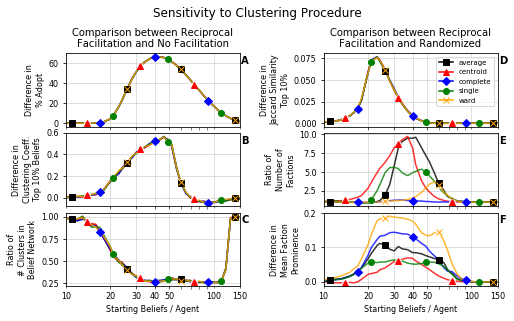

In [46]:
files = glob.glob('data/Hier Avg Link Shuffle/sensitivity_to_clustering_*.pickle')
dfs = [pd.read_pickle(f) for f in files]
df = pd.concat(dfs)
means = df.groupby(by=['Clustering', 'N Starting Beliefs']).aggregate('mean')
counts = df.groupby(by=['Clustering', 'N Starting Beliefs']).aggregate('count')
print(counts.max().max())

plt.rcParams["lines.markersize"] = 6
f, ax = plot_results(means,
             'Sensitivity to Clustering Procedure',
              colors = ['k', 'r', 'b', 'g', 'orange'],
              markers=['s', '^', 'D', 'o', 'x'])

plt.savefig('figS14 sens clustering rule.svg')
plt.savefig('figS14 sens clustering rule.png', bbox_inches='tight', dpi=150)